In [1]:
!unzip '/content/data1.zip'

Archive:  /content/data1.zip
  inflating: data1 (2).csv           


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

import random
random.seed(123)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/data1 (2).csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Eliminate from the analysis: education, native-country

In [5]:
df.drop(['education','native-country'],axis=1,inplace=True)

In [6]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


# Combine occupation in only 5 categories

In [7]:

#df = pd.DataFrame(data)
value = list(df['occupation'].unique())

occupation_mapping = {
    'Admin': [' Adm-clerical'],
    'Management': [' Exec-managerial'],
    'Service': [' Handlers-cleaners', ' Other-service', ' Priv-house-serv'],
    'Professional': [' Prof-specialty', ' Tech-support'],
    'Other': [' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Protective-serv', ' Armed-Forces', ' ?']

}

for category, occupations in occupation_mapping.items():
  for value in df['occupation']:
    if value in occupations:
      df['occupation'][df['occupation']==value]=category
    else:
      pass




In [8]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,39,State-gov,77516,13,Never-married,Admin,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Management,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,9,Divorced,Service,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Service,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Professional,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Professional,Wife,White,Female,0,0,38,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Other,Husband,White,Male,0,0,40,>50K
32558,58,Private,151910,9,Widowed,Admin,Unmarried,White,Female,0,0,40,<=50K
32559,22,Private,201490,9,Never-married,Admin,Own-child,White,Male,0,0,20,<=50K


# Basic Data Analysis

In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  target          32561 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [11]:
df[df.isna()].count()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
target            0
dtype: int64

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_hist(column_name, assign_name,angle=0):
  # Separate data based on target value
  df_less_equal_50k = df[df['target'] == ' <=50K']
  df_greater_50k = df[df['target'] == ' >50K']
  # Plotting histograms
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.hist(df_less_equal_50k[column_name], bins=5, color='Black', alpha=0.7)
  plt.xlabel(assign_name)
  plt.ylabel('Frequency')
  plt.title(f'{assign_name} Distribution for <=50K')
  plt.xticks(rotation=angle)

  plt.subplot(1, 2, 2)
  plt.hist(df_greater_50k[column_name], bins=5, color='Red', alpha=0.7)
  plt.xlabel(assign_name)
  plt.ylabel('Frequency')
  plt.title(f'{assign_name} Distribution for >50K')
  plt.xticks(rotation=angle)

  plt.tight_layout()
  plt.show()




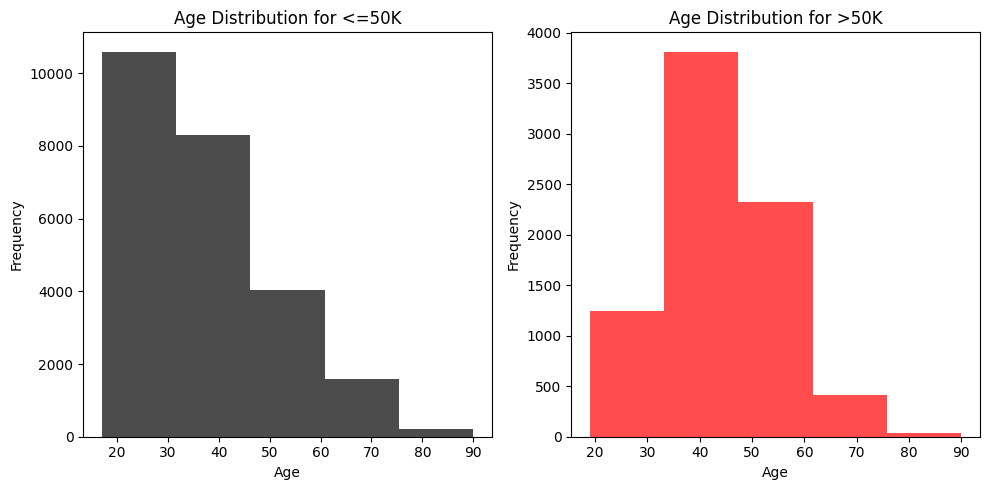

In [13]:
plot_hist('age', "Age")

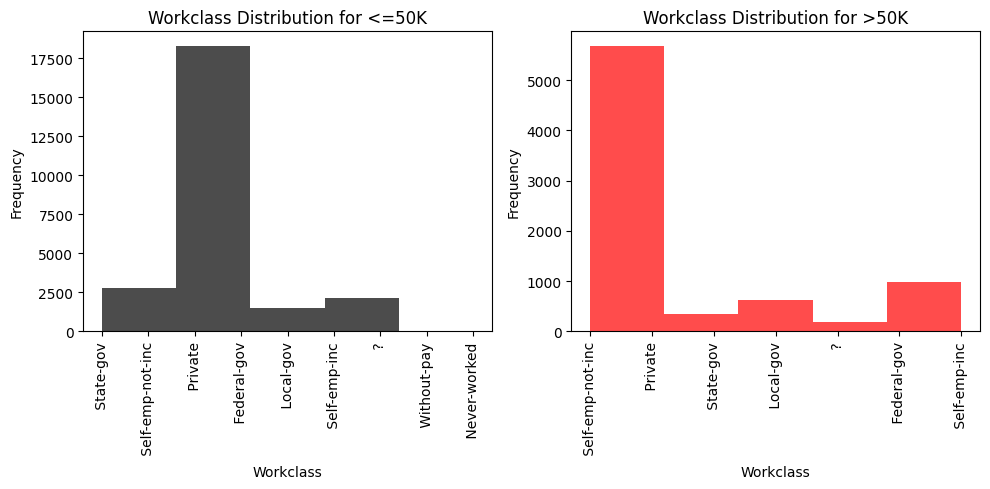

In [14]:
plot_hist('workclass', "Workclass",90)

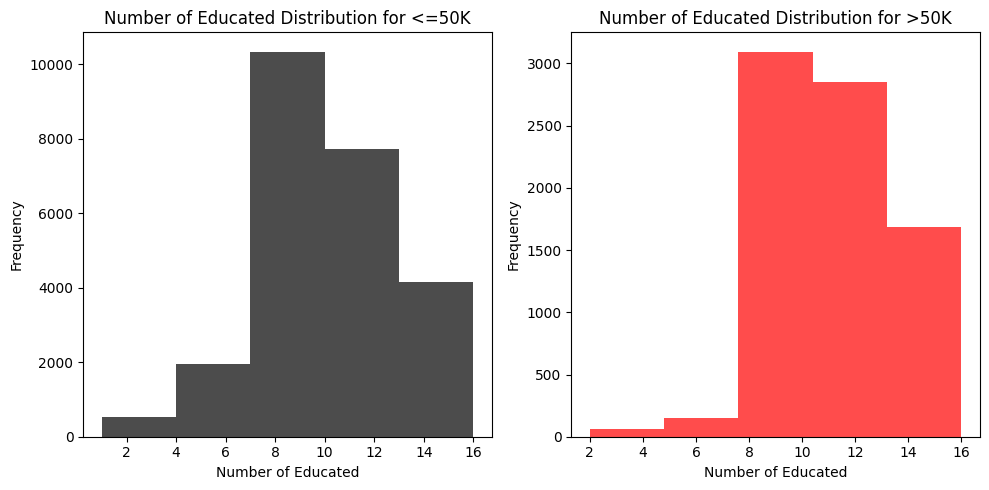

In [15]:
plot_hist('education-num', "Number of Educated")

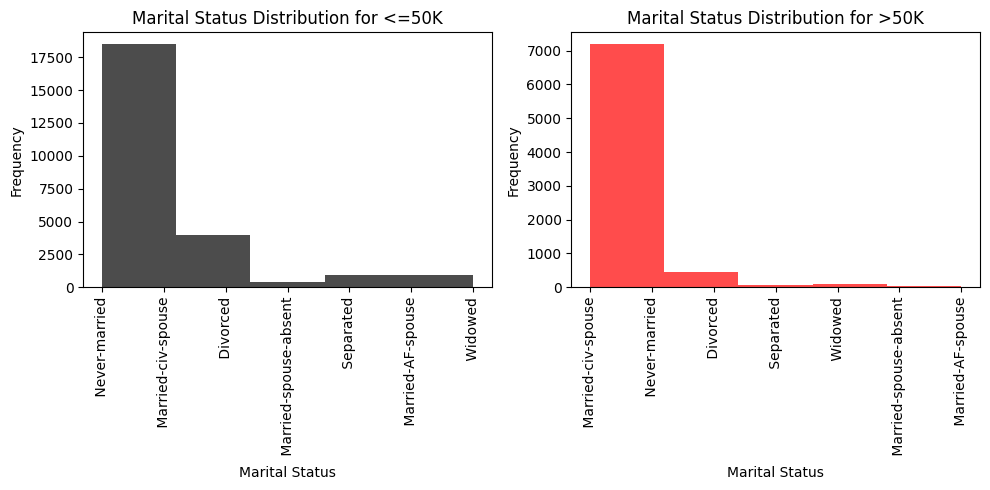

In [16]:
plot_hist('marital-status', "Marital Status",90)

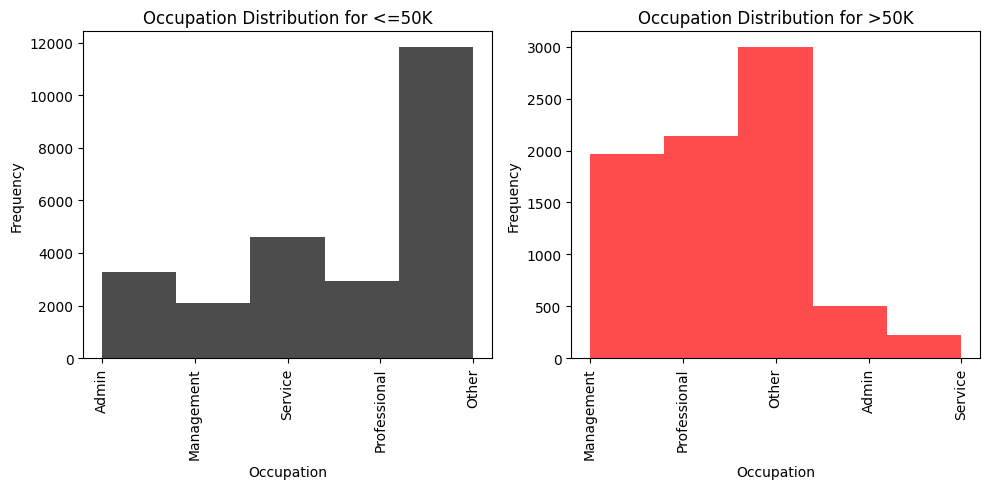

In [17]:
plot_hist('occupation', "Occupation",90)

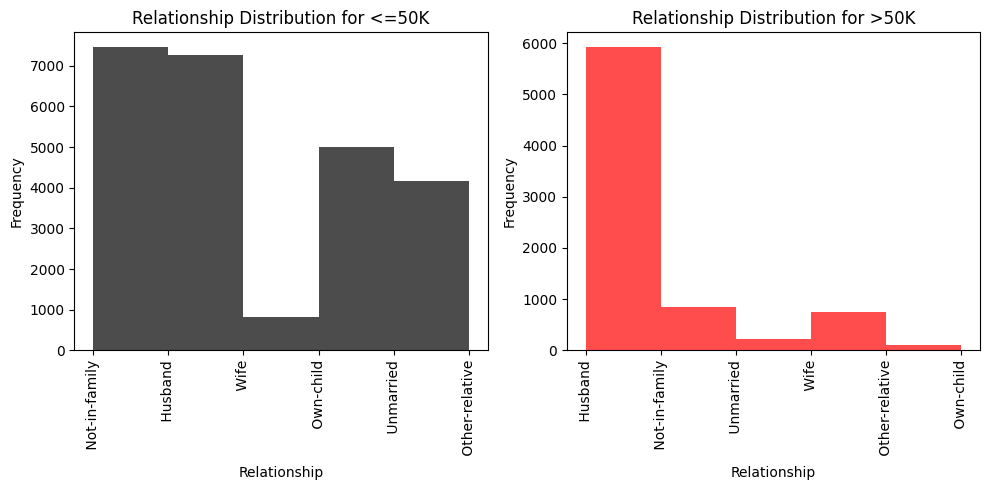

In [18]:
plot_hist('relationship', "Relationship",90)

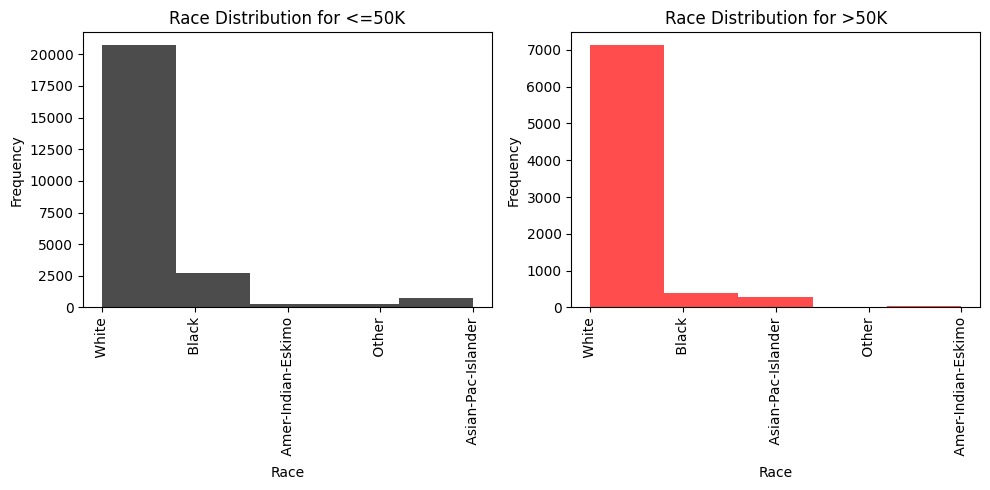

In [19]:
plot_hist('race', "Race",90)

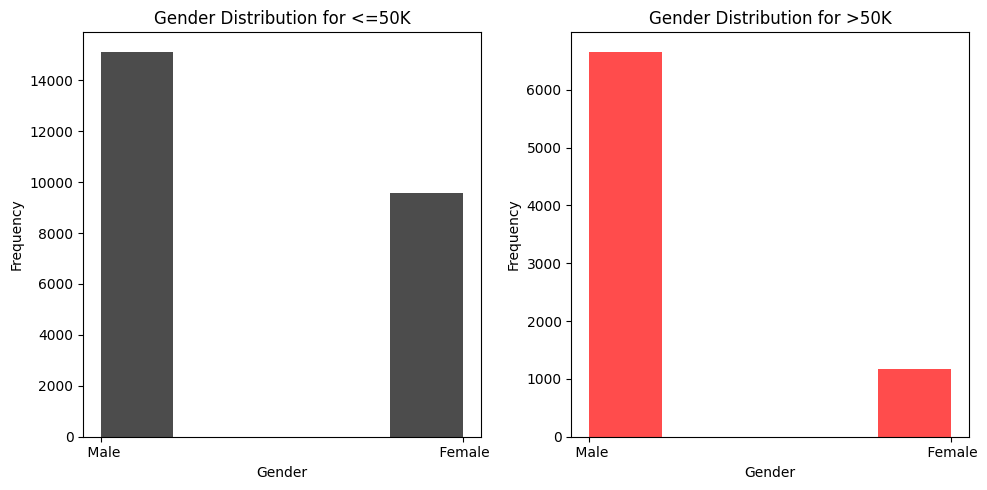

In [20]:
plot_hist('sex', "Gender")

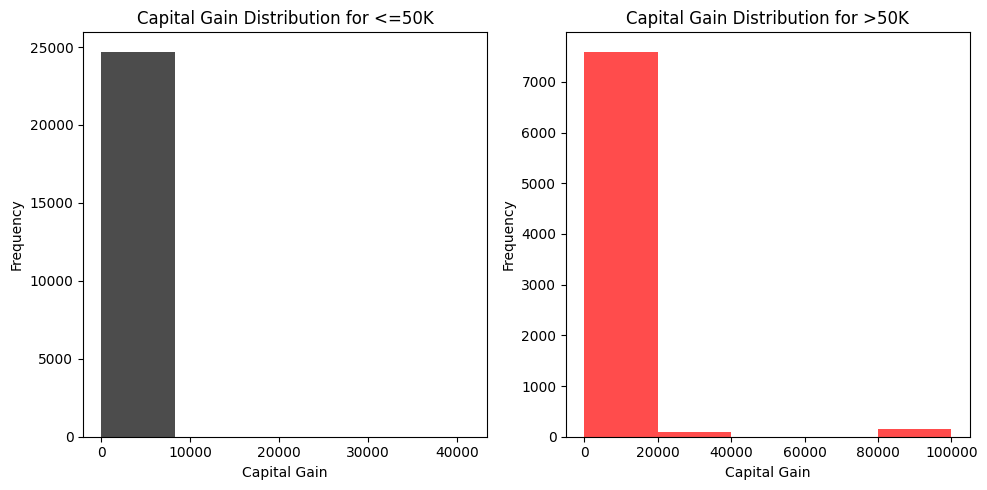

In [21]:
plot_hist('capital-gain', "Capital Gain")

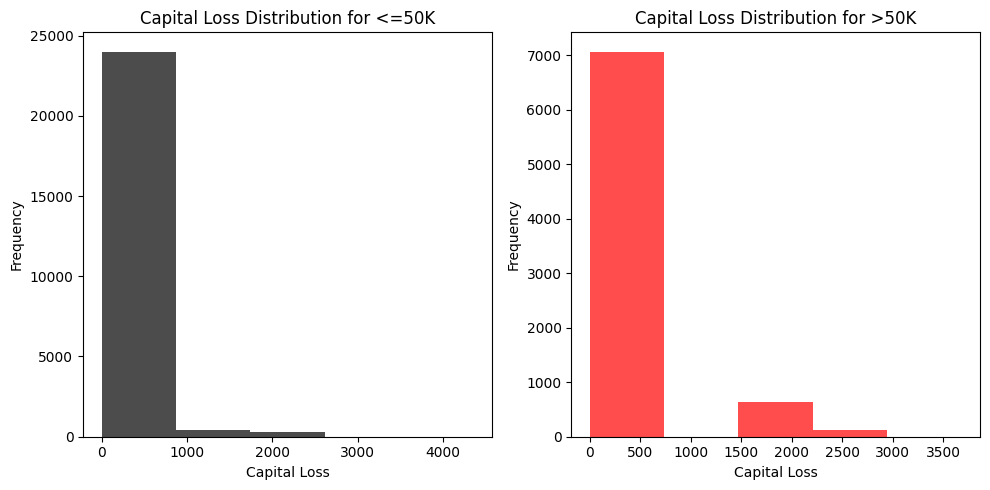

In [22]:
plot_hist('capital-loss', "Capital Loss")

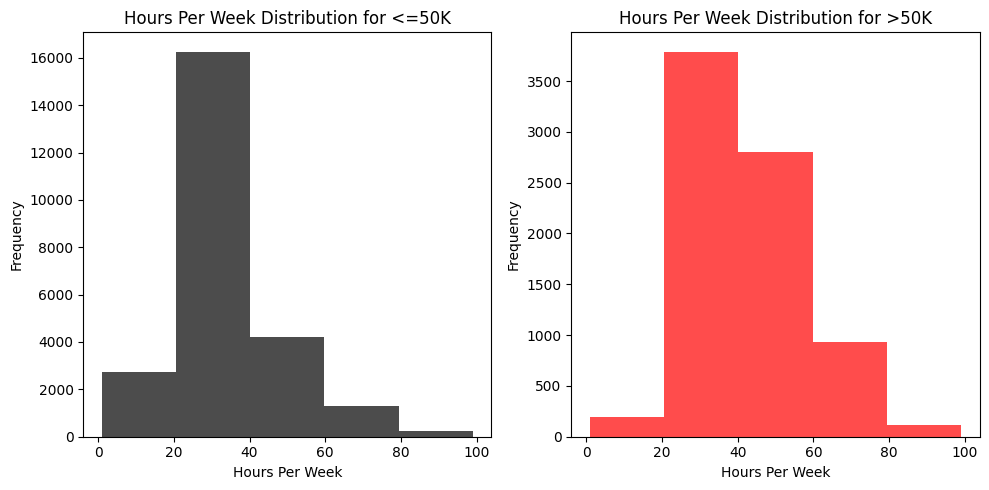

In [23]:
plot_hist('hours-per-week', "Hours Per Week")

# Divide into train 70% and validation 30%


In [24]:
X = df.drop(columns=["target"])
y = df["target"]


X = pd.get_dummies(X, dtype=float)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123)


In [25]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32557,40,154374,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
32558,58,151910,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32559,22,201490,9,0,0,20,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [30]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: target, Length: 32561, dtype: object

# Apply Random Forests, Gradient Boosting and logistic regression

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=123)
rf_param_grid = {
    'n_estimators': [50],
    'max_depth': [3],
    'min_samples_split': [2]
}
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_val_preds = rf_grid_search.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_preds)


### Confusion Matrix

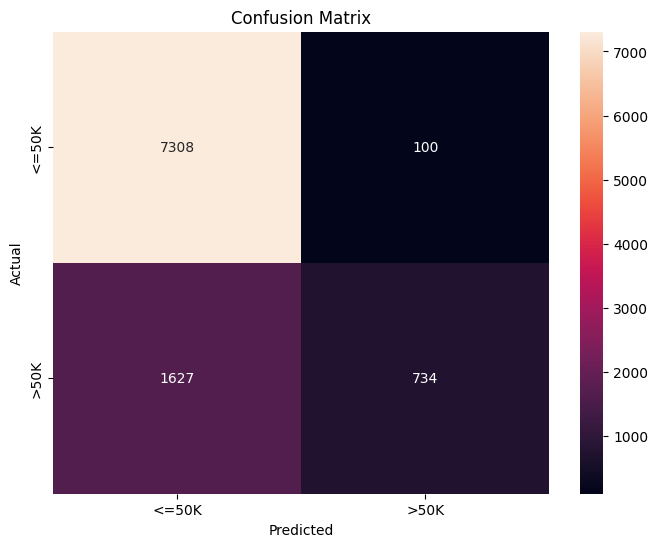

In [ ]:
cm = confusion_matrix(y_val, rf_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=123)
gb_param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3]
}
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
gb_val_preds = gb_grid_search.predict(X_val)
gb_val_accuracy = accuracy_score(y_val, gb_val_preds)


### Confusion Matrix

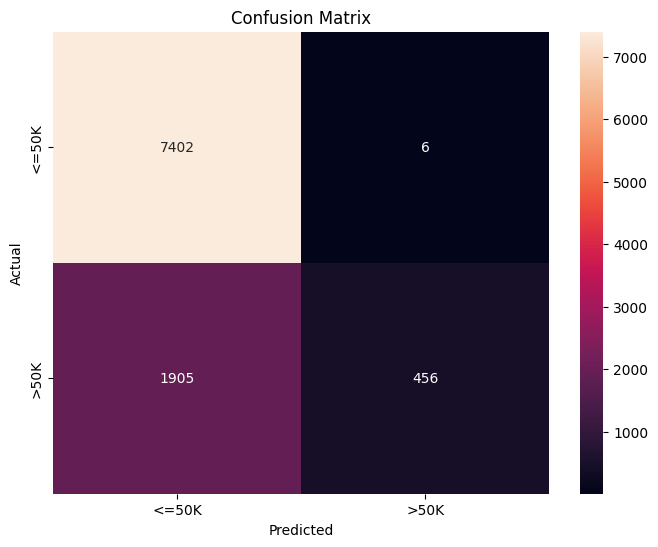

In [ ]:
cm = confusion_matrix(y_val, gb_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=123)
lr_param_grid = {
    'C': [0.01],
    'penalty': ['l2'],
    'solver':['saga'],
    'max_iter': [100]
}

lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)
lr_val_preds = lr_grid_search.predict(X_val)
lr_val_accuracy = accuracy_score(y_val, lr_val_preds)

### Confusion Matrix

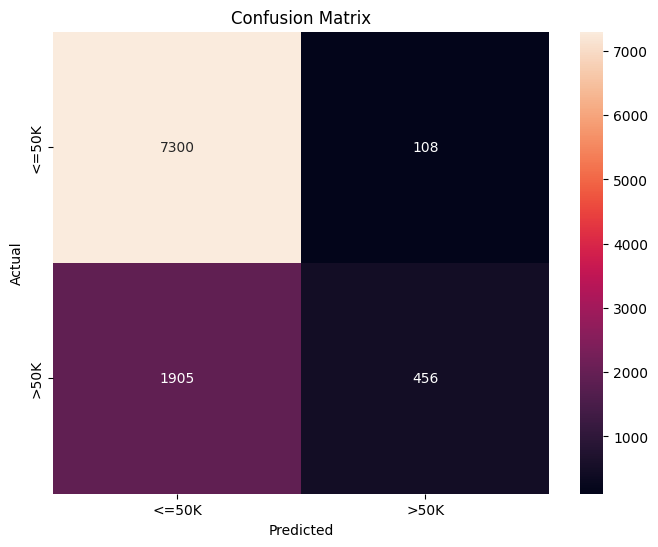

In [ ]:
cm = confusion_matrix(y_val, lr_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparison

In [ ]:
print("Random Forest - Validation Accuracy:", rf_val_accuracy)
print("Gradient Boosting - Validation Accuracy:", gb_val_accuracy)
print("Logistic Regression - Validation Accuracy:", lr_val_accuracy)

Random Forest - Validation Accuracy: 0.8232162964479476
Gradient Boosting - Validation Accuracy: 0.8043812058552564
Logistic Regression - Validation Accuracy: 0.7939400143310472


# Look for the optimal hyperparameters for each model

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=123)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_
rf_val_preds = rf_best_model.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_preds)


### Confusion Matrix

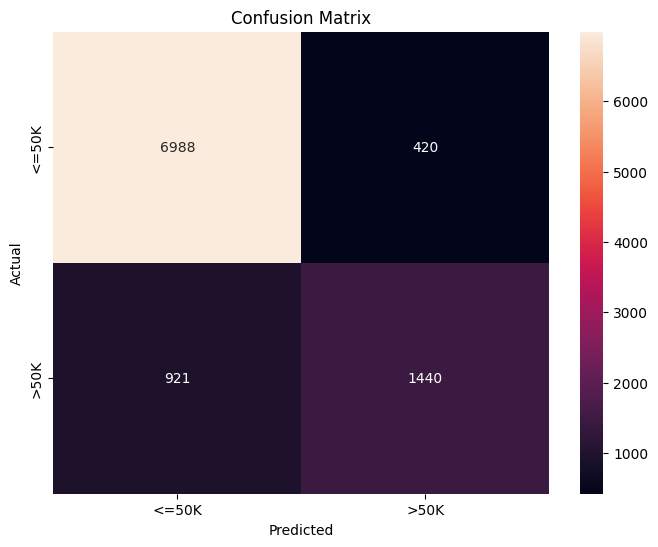

In [ ]:
cm = confusion_matrix(y_val, rf_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=123)
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10]
}
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
gb_best_params = gb_grid_search.best_params_
gb_best_model = gb_grid_search.best_estimator_
gb_val_preds = gb_best_model.predict(X_val)
gb_val_accuracy = accuracy_score(y_val, gb_val_preds)

### Confusion Matrix

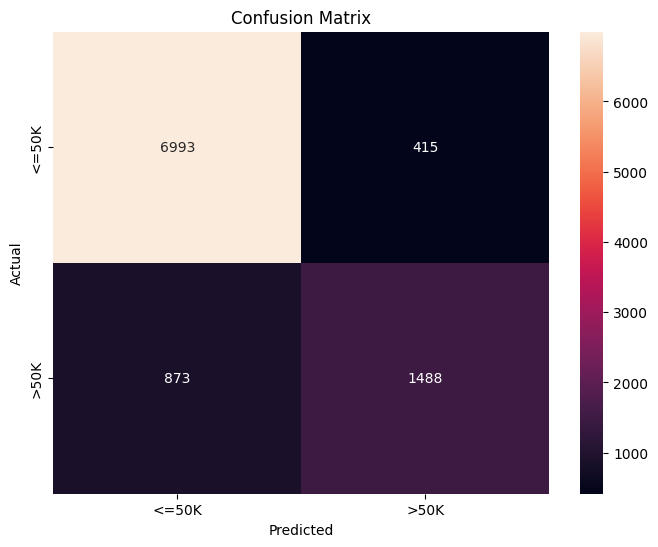

In [ ]:
cm = confusion_matrix(y_val, gb_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=123)
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100,200]
}
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)
lr_best_params = lr_grid_search.best_params_
lr_best_model = lr_grid_search.best_estimator_
lr_val_preds = lr_best_model.predict(X_val)
lr_val_accuracy = accuracy_score(y_val, lr_val_preds)

### Confusion Matrix

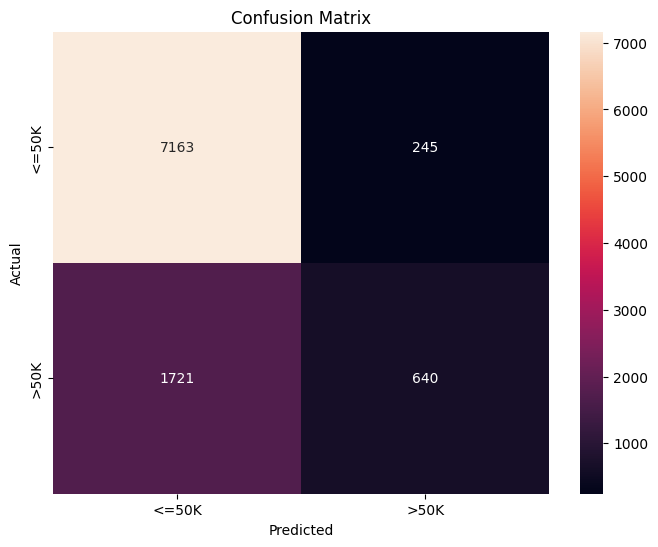

In [ ]:
cm = confusion_matrix(y_val, lr_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparision

In [ ]:
print("Random Forest - Best Params:", rf_best_params)
print("Random Forest - Validation Accuracy:", rf_val_accuracy)
print("Gradient Boosting - Best Params:", gb_best_params)
print("Gradient Boosting - Validation Accuracy:", gb_val_accuracy)
print("Logistic Regression - Best Params:", lr_best_params)
print("Logistic Regression - Validation Accuracy:", lr_val_accuracy)

Random Forest - Best Params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - Validation Accuracy: 0.8627290408434845
Gradient Boosting - Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Gradient Boosting - Validation Accuracy: 0.8681543658511618
Logistic Regression - Best Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression - Validation Accuracy: 0.7987511516020064


# Conculsion

According to the above comparision we see that. Gradiend Boosting work quit good in our validation dataset. To extend this project if we use neural network, or if we extend our dataset the result will be more accurate and better.